<a href="https://colab.research.google.com/github/FHnt97/RUG_TOM_SIO/blob/main/Assignment_A_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment A.4
## Part 1

**Authors:** Group 2.1

*   V. Stupko			S2367246
*   S. Zuidhoek			S4190947
*   R. van der Straten		S3125327	
*   F. Höhne Tarragona		S4605632

**Course:** Smart Industry Operations *EBM223A05.2021-2022.1B*

**Lecturer:** *Dr Christos Emmanouilidis*

***2022-01-14***

<br>

In the first part of the assignment, it is asked to make a salary offer to employees based on a data analysis. 

In this respect, a list with historical data of employees is available including mean salary numbers and specific skills and charateristics. The objective is to make a salary offer based on a data analysis about what should be the expected level of salary for a given skillset. 

This can be considered as a regression model in which the offer should be just below this expected level and more specifically at 95% of the expected level.

This part of te report is divided into sections as follows:
1. Importing libraries and data
2. Data analysis and basic data clearning
3. Exploratory analysis of data (correlation analysis)
4. Set-up of regression model
5. Results and conclusion



---



## 1. Importing of libraries and data set

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Initially, we read the data file and identify its charateristics.

In [ ]:
# read file with historical data
df = pd.read_csv('/content/drive/Shareddrives/SIO - Group 2.1 (S1b)/A4 (14.01.2022)/A4_1.csv', sep=',')
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total
0,2008676LWE,Sheldon,Wold,male,25,13/02/1996,0,5,design,China,57,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,67773.17534
1,6946901SAL,Jennifer,Golka,female,27,05/11/1994,1,5,marketing,Luxembourg,33,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,75374.99057
2,1094956XBR,Rose,Dooley,female,65,12/11/1956,8,4,sales,Romania,52,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,72796.63579
3,2915219VKT,Susan,Hickman,female,47,28/12/1973,21,4,operations,China,93,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,75963.93030
4,0144998MUS,Orlando,Hilker,male,45,23/05/1976,16,6,innovation,Poland,87,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,98462.56868


The goal is to predict the salary for potential employees. The data set of the employees will be loaded in. This will benefit the code in the future.


In [ ]:
# laod file for candidate profiles
df_test = pd.read_csv('/content/drive/Shareddrives/SIO - Group 2.1 (S1b)/A4 (14.01.2022)/A4_2.csv', sep=',')
df_test.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping
0,7161223DRO,Marie,Wofford,female,47,23/08/1974,0,8,marketing,Spain,66,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1
1,1026355EJG,Louis,Bennett,male,52,25/04/1969,11,5,finance,Slovenia,60,1,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0
2,7771383CNN,Larry,Faz,male,36,24/08/1985,10,7,marketing,Sweden,25,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1
3,4185856VIM,Brittany,Newman,female,25,15/08/1996,0,5,operations,Bulgaria,17,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0
4,2978676ENQ,Jason,Corvino,m,60,15/05/1961,22,8,design,China,32,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0


## 2. Initial data analysis and cleaning




We would like to know more about which data is present in the set including the data type. From this overview, we can see that there are no NA values. It becomes clear that 'date of birth' is an object, which should be converted to datetime. Furthermore, the 'total' column is charaterized as a float, which should be an integer as it represents the salary.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecID                400 non-null    object 
 1   First Name           400 non-null    object 
 2   Surname              400 non-null    object 
 3   Gender               400 non-null    object 
 4   Age                  400 non-null    int64  
 5   Date of birth        400 non-null    object 
 6   Years of experience  400 non-null    int64  
 7   Education Level      400 non-null    int64  
 8   Department           400 non-null    object 
 9   Country              400 non-null    object 
 10  Performance          400 non-null    int64  
 11  EN                   400 non-null    int64  
 12  F                    400 non-null    int64  
 13  SP                   400 non-null    int64  
 14  NL                   400 non-null    int64  
 15  GE                   400 non-null    int

The dataset which represents possible employees, shows a similar construction regarding the types of each data column. Based on that finding, the changes made to the historical data set will also be made to the other data set (i.e. to df_test). This will only be the case for the data analysis and changes to the data types, formatting, etc. 


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RecID                100 non-null    object
 1   First Name           100 non-null    object
 2   Surname              100 non-null    object
 3   Gender               100 non-null    object
 4   Age                  100 non-null    int64 
 5   Date of birth        100 non-null    object
 6   Years of experience  100 non-null    int64 
 7   Education Level      100 non-null    int64 
 8   Department           100 non-null    object
 9   Country              100 non-null    object
 10  Performance          100 non-null    int64 
 11  EN                   100 non-null    int64 
 12  F                    100 non-null    int64 
 13  SP                   100 non-null    int64 
 14  NL                   100 non-null    int64 
 15  GE                   100 non-null    int64 
 16  IT       

In [ ]:
# change Dtype of date for correct formatting
df['Date of birth'] = pd.to_datetime(df['Date of birth'])
df_test['Date of birth'] = pd.to_datetime(df_test['Date of birth'])

There is no 'Total' column present for the candidate data set, so this step will not be necessary for df_test.

In [ ]:
# change Dtype of total for correct formatting
df['Total'] = df['Total'].astype('int64')

Below, important data columns are checked on consistency and cleaned accordingly. For gender, 'm' and 'f' are made consistent to the syntax of 'male' and 'female'.

In [ ]:
# check types of Gender entries
df['Gender'].unique()

array(['male', 'female', 'm', 'f'], dtype=object)

In [ ]:
df_test['Gender'].unique()

array(['female', 'male', 'm', 'f'], dtype=object)

In [ ]:
# edit entries for consistent naming 
df['Gender'] = df['Gender'].replace(['f','m'],['female','male'])
df_test['Gender'] = df_test['Gender'].replace(['f','m'],['female','male'])

For the years of experience it is cheched that no faulty and negative values are present, which is indeed true.

In [ ]:
df['Years of experience'].describe()

count    400.000000
mean      10.325000
std        9.119061
min        0.000000
25%        1.750000
50%        9.000000
75%       16.000000
max       35.000000
Name: Years of experience, dtype: float64

In [ ]:
df_test['Years of experience'].describe()

count    100.000000
mean      10.720000
std        9.306325
min        0.000000
25%        2.750000
50%        9.000000
75%       17.250000
max       31.000000
Name: Years of experience, dtype: float64

The same is cheched for age. It can be seen that there are no underage employees present.

In [ ]:
df['Age'].describe()

count    400.000000
mean      42.602500
std       13.932868
min       18.000000
25%       31.000000
50%       43.000000
75%       54.000000
max       67.000000
Name: Age, dtype: float64

In [ ]:
df_test['Age'].describe()

count    100.000000
mean      44.140000
std       13.900091
min       18.000000
25%       33.750000
50%       45.500000
75%       54.750000
max       67.000000
Name: Age, dtype: float64

Moreover, a uniform performance measure is applied with a score instead of a letter.

In [ ]:
df['Performance'].unique()

array([ 57,  33,  52,  93,  87,  82,  32,  64,  86,  44,   6,  15,  48,
        26, 100,  84,  89,  80,  63,  66,  88,  13,  85,  92,  41,  76,
        65,  50,  68,  36,   7,  95,  62,  10,  74,  47,   4,  81,  55,
        58,  91,  60,  46,  27,  56,  49,  23,  19,  28,  61,  34,  16,
        96,  73,   0,  43,  78,  21,  67,  97,  79,  39,  29,  42,  25,
        22,  11,  35,  71,  45,  83,  24,  38,  18,  31,  77,  54,  90,
        69,  94,  17,   8,  75,   5,  98,  53,  12,   3,  37,  51,  20,
        14,  59,  70,  99,   9,   2,  72,  40])

In [ ]:
df_test['Performance'].unique()

array([ 66,  60,  25,  17,  32,  10,  61,  33,  85,  68,  71,  92,  74,
        31,  75,  54, 100,  83,  69,  16,  81,  19,   9,  56,  37,  44,
        26,  41,  18,  97,  90,  14,  59,  43,  12,  47,  50,  84,  80,
         8,  82,  36,   6,  58,  38,  72,  93,  96,  39,  86,   4,  94,
         2,  87,  22,  70,  46,  15])

Finally, we check how many departments are present at the company.

In [ ]:
df['Department'].unique()

array(['design', 'marketing', 'sales', 'operations', 'innovation',
       'purchasing', 'finance'], dtype=object)

In [ ]:
df_test['Department'].unique()

array(['marketing', 'finance', 'operations', 'design', 'sales',
       'purchasing', 'innovation'], dtype=object)

## 3. Exploratory analysis of data

In order to investigate possible correlations between the data types, we would like to sum the 'number of languages' and the 'number of skills', which is done below.

In [ ]:
# sum total number of languages 
df['Number of languages'] = df[['EN', 'IT', 'GE', 'NL', 'SP', 'F']].sum(axis=1)

In [ ]:
# sum total number of skills 
df['Number of skills'] = df[['Assembly', 'Machining', 'Welding', 'Additive', 'Painting', 'Control', 'Quality', 'Planning', 'Services', 'Shipping']].sum(axis=1)

In [ ]:
# check correctly implemented change
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total,Number of languages,Number of skills
0,2008676LWE,Sheldon,Wold,male,25,1996-02-13,0,5,design,China,57,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,67773,4,7
1,6946901SAL,Jennifer,Golka,female,27,1994-05-11,1,5,marketing,Luxembourg,33,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,75374,3,5
2,1094956XBR,Rose,Dooley,female,65,1956-12-11,8,4,sales,Romania,52,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,72796,3,4
3,2915219VKT,Susan,Hickman,female,47,1973-12-28,21,4,operations,China,93,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,75963,3,6
4,0144998MUS,Orlando,Hilker,male,45,1976-05-23,16,6,innovation,Poland,87,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,98462,5,8


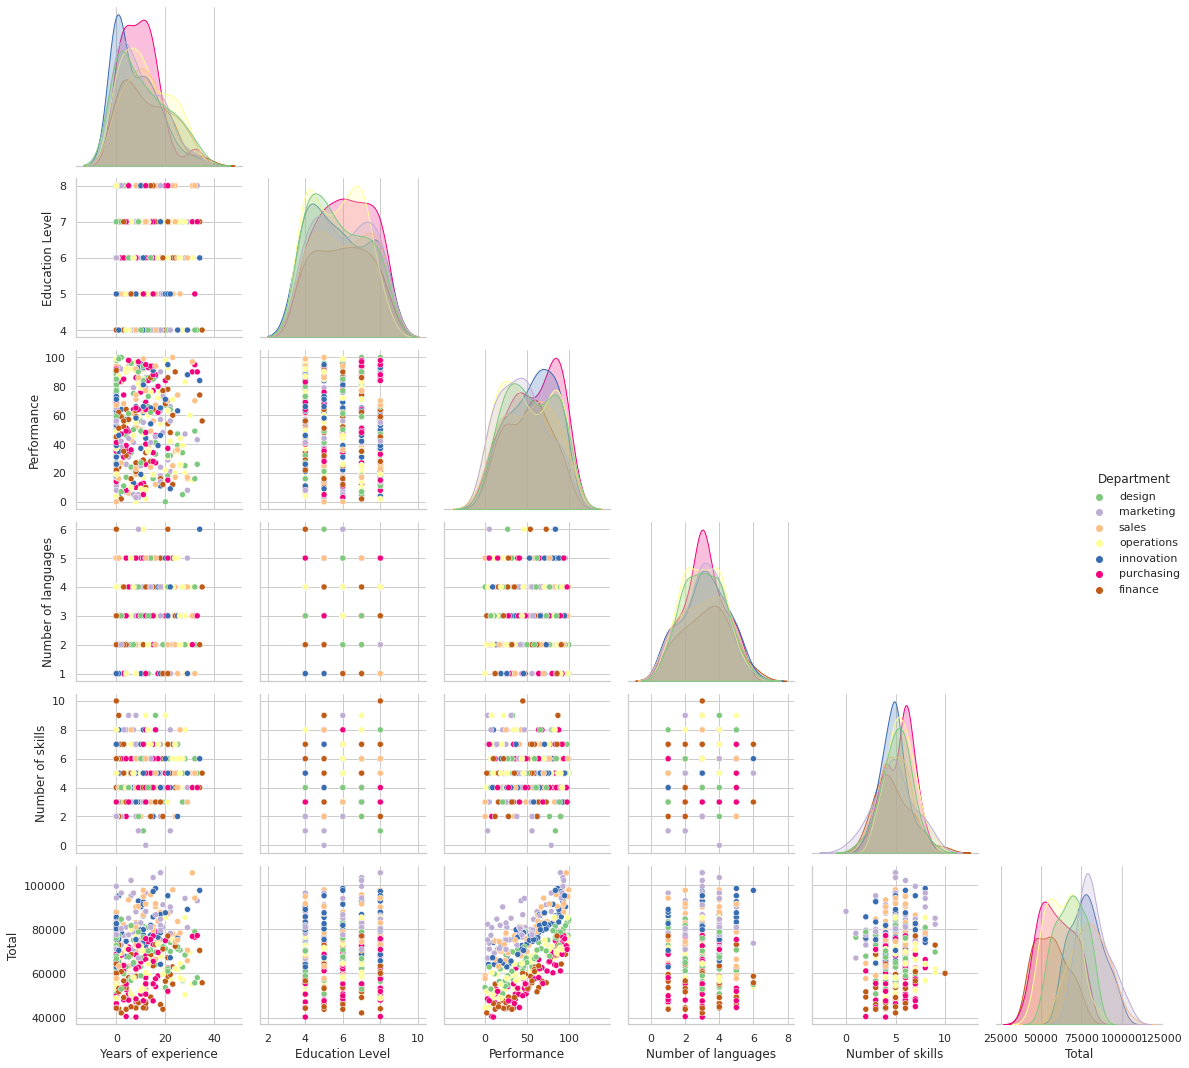

In [ ]:
# visualize data (relationship of attibutes & histogramms) 
%matplotlib inline

# set style and select data
sns.set(style='whitegrid', context='notebook')
cols = ['Years of experience','Education Level', 'Department', 'Performance', 'Number of languages', 'Number of skills', 'Total']

# visualise
sns.pairplot(df[cols], hue = 'Department', palette='Accent', corner=True, height=2.5);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

The output shows that the total per department differs quite a lot. Based on this outcome, each department will be looked at differently.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


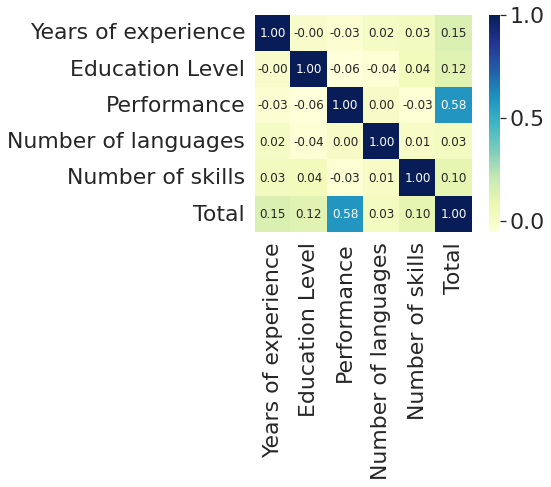

In [ ]:
# show correlation among variables - heatmap
cols = ['Years of experience','Education Level', 'Performance', 'Number of languages', 'Number of skills', 'Total']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=cols,
            xticklabels=cols,
             cmap='YlGnBu')

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

From the correlation between variables, it can be seen that there is a positive correlation between performance and salary. This positive correlation of 0.58 is intuitive since in practice performance is usually a parameter that determines the salary level.

## 4. Set-up of regression model

As stated, each department will be looked at seperatly because of the difference in the total value. For the first department each step will be described in detail, the exact steps will applied for each department.

Whilst dividing the dataset into departments reduces the total number of datapoints per model for training the data, as the correlation between performance and salary is high  within each department, this shoudn't be a probelm. 

###4.1 Design department

First a dataframe for the specific department will be created. In this case for the design department. After that the X-train and y-train are made based on the historical data of file: 'A4_1.csv'. The performance data and total data are placed in a list and then in a numpy array. Because the regression analysis requires two-dimensional data, an extra dimension will be added through the reshape tool. Each regression is specified for the department, for example the regressor for the design department is called 'regressor_design'.

In [ ]:
# select data
df_design = df[df['Department']=='design']
X_train_design = df_design['Performance'].tolist()
y_train_design = df_design['Total'].tolist() 

# format data
X_train_design = np.array(X_train_design).reshape((len(X_train_design),1))
y_train_design = np.array(y_train_design).reshape((len(y_train_design),1))


# set & train model
regressor_design = LinearRegression()
regressor_design.fit(X_train_design, y_train_design)

LinearRegression()

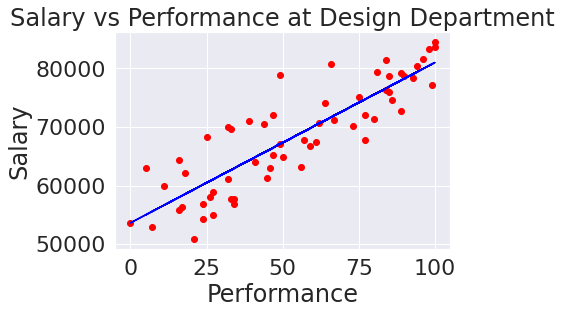

In [ ]:
# graph results 
plt.scatter(X_train_design,y_train_design, color='red',)
plt.plot(X_train_design,regressor_design.predict(X_train_design), color='blue')
plt.title('Salary vs Performance at Design Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

The results are plotted on a graph to show the correlation between performance and salary. Now that the historical data is used to make a regression analysis, the regressor can be applied to predict outcomes for new data. The new data is loaded in a dataframe specific to the department, for this case design ('df_design_test'). The performance data will be loaded in the same way as the historical performance data, as a list and then a two-dimensional numpy array. With the 'regressor_design.predict()' tool, possible salary value will be predict based on the regression analysis for the department. The predict tool gives the expected value. This outcome will be multiplied by 0.95, the reason for that is ask to offer below the expected level, specifically 95%. This value will be added to the dataframe in column called 'Salary offer'.

In [ ]:
df_design_test = df_test[df_test['Department']=='design']
X_test_design = df_design_test['Performance'].tolist()
X_test_design = np.array(X_test_design).reshape((len(X_test_design),1))

total_design_pred = regressor_design.predict(X_test_design)

df_design_test['Salary offer'] = total_design_pred *0.95
df_design_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
4,2978676ENQ,Jason,Corvino,male,60,1961-05-15,22,8,design,China,32,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,59262.649831
27,8376118WZA,William,Cook,male,36,1985-12-16,10,4,design,Slovakia,56,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,65506.132367
29,5164589FFK,Kenneth,Kaufman,male,27,1994-12-07,1,7,design,United Kingdom,100,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,76952.517017
31,5535640VNS,Elizabeth,Oneil,female,39,1982-12-19,13,6,design,Australia,10,0,0,0,0,1,1,1,0,0,1,0,0,1,1,1,0,53539.457507
32,1651899XKR,Willie,Jones,female,58,1963-03-30,26,6,design,France,44,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,62384.391099


###4.2 Marketing department

In [ ]:
df_marketing = df[df['Department']=='marketing']
X_train_marketing = df_marketing['Performance'].tolist()
y_train_marketing = df_marketing['Total'].tolist() 

X_train_marketing = np.array(X_train_marketing).reshape((len(X_train_marketing),1))
y_train_marketing = np.array(y_train_marketing).reshape((len(y_train_marketing),1))

regressor_marketing = LinearRegression()
regressor_marketing.fit(X_train_marketing, y_train_marketing)

LinearRegression()

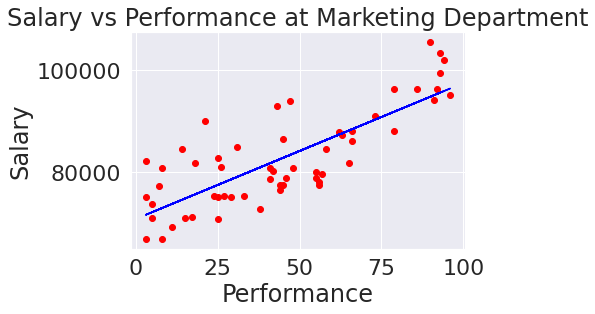

In [ ]:
plt.scatter(X_train_marketing,y_train_marketing, color='red',)
plt.plot(X_train_marketing,regressor_marketing.predict(X_train_marketing), color='blue')
plt.title('Salary vs Performance at Marketing Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_marketing_test = df_test[df_test['Department']=='marketing']
X_test_marketing = df_marketing_test['Performance'].tolist()
X_test_marketing = np.array(X_test_marketing).reshape((len(X_test_marketing),1))

total_marketing_pred = regressor_marketing.predict(X_test_marketing)

df_marketing_test['Salary offer'] = total_marketing_pred *0.95
df_marketing_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
0,7161223DRO,Marie,Wofford,female,47,1974-08-23,0,8,marketing,Spain,66,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,84015.749825
2,7771383CNN,Larry,Faz,male,36,1985-08-24,10,7,marketing,Sweden,25,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,73651.408491
6,1442681EGJ,Diana,Pierce,female,59,1962-01-04,23,4,marketing,Portugal,61,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,82751.805760
16,9973358TVZ,Daniel,Blocker,male,67,1954-12-05,21,6,marketing,Lithuania,100,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,92610.569468
23,2351156XEW,Diana,Reyna,female,52,1969-09-09,5,8,marketing,Lithuania,81,0,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,87807.582020


###4.3 Sales department

In [ ]:
df_sales = df[df['Department']=='sales']
X_train_sales = df_sales['Performance'].tolist()
y_train_sales = df_sales['Total'].tolist() 

X_train_sales = np.array(X_train_sales).reshape((len(X_train_sales),1))
y_train_sales = np.array(y_train_sales).reshape((len(y_train_sales),1))

regressor_sales = LinearRegression()
regressor_sales.fit(X_train_sales, y_train_sales)

LinearRegression()

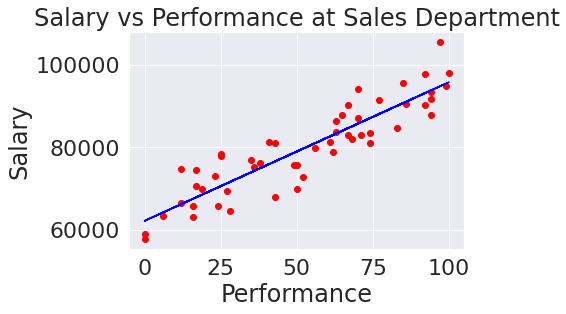

In [ ]:
plt.scatter(X_train_sales,y_train_sales, color='red',)
plt.plot(X_train_sales,regressor_sales.predict(X_train_sales), color='blue')
plt.title('Salary vs Performance at Sales Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_sales_test = df_test[df_test['Department']=='sales']
X_test_sales = df_sales_test['Performance'].tolist()
X_test_sales = np.array(X_test_sales).reshape((len(X_test_sales),1))

total_sales_pred = regressor_sales.predict(X_test_sales)

df_sales_test['Salary offer'] = total_sales_pred *0.95
df_sales_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
8,2573899YAR,James,Jenkins,male,66,1955-08-02,11,6,sales,Australia,85,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,86166.659559
9,0875699KOM,Claudine,Moss,female,64,1957-04-20,0,5,sales,Republic of Cyprus,68,1,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,80755.418424
12,0837760JYH,Larry,Fitch,male,57,1964-06-24,25,4,sales,Republic of Congo,74,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,82665.268236
13,5078841BZI,Jim,Powell,male,64,1957-10-10,21,8,sales,Brazil,31,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,1,68978.011249
14,6593809LBO,Tim,Anderson,male,24,1997-09-03,0,8,sales,Poland,75,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,82983.576538


###4.4 Operations department

In [ ]:
df_operations = df[df['Department']=='operations']
X_train_operations = df_operations['Performance'].tolist()
y_train_operations = df_operations['Total'].tolist() 

X_train_operations = np.array(X_train_operations).reshape((len(X_train_operations),1))
y_train_operations = np.array(y_train_operations).reshape((len(y_train_operations),1))

regressor_operations = LinearRegression()
regressor_operations.fit(X_train_operations, y_train_operations)

LinearRegression()

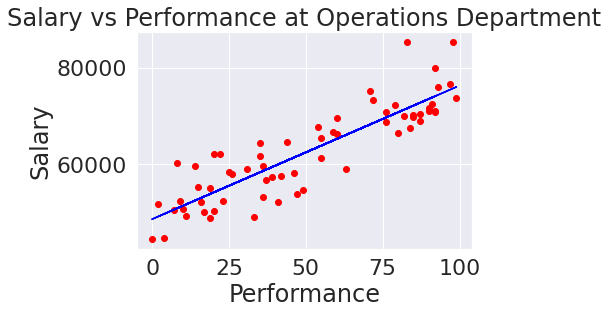

In [ ]:
plt.scatter(X_train_operations,y_train_operations, color='red',)
plt.plot(X_train_operations,regressor_operations.predict(X_train_operations), color='blue')
plt.title('Salary vs Performance at Operations Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_operations_test = df_test[df_test['Department']=='operations']
X_test_operations = df_operations_test['Performance'].tolist()
X_test_operations = np.array(X_test_operations).reshape((len(X_test_operations),1))

total_operations_pred = regressor_operations.predict(X_test_operations)

df_operations_test['Salary offer'] = total_operations_pred *0.95
df_operations_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
3,4185856VIM,Brittany,Newman,female,25,1996-08-15,0,5,operations,Bulgaria,17,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,50682.482401
5,4408681CGR,Donald,Alexander,male,32,1989-11-18,6,7,operations,Italy,10,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,48846.260298
7,1554856UXB,Jamal,Williams,male,67,1954-09-01,0,7,operations,Republic of Cyprus,33,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,54879.561494
10,2282414FQF,Jennifer,Lindenpitz,female,54,1966-12-23,23,7,operations,USA,71,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,64847.624339
11,5682588SSA,Roger,Tharp,male,47,1974-01-02,5,4,operations,Slovakia,92,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,70356.290648


###4.5 Innovation department


In [ ]:
df_innovation = df[df['Department']=='innovation']
X_train_innovation = df_innovation['Performance'].tolist()
y_train_innovation = df_innovation['Total'].tolist() 

X_train_innovation = np.array(X_train_innovation).reshape((len(X_train_innovation),1))
y_train_innovation = np.array(y_train_innovation).reshape((len(y_train_innovation),1))

regressor_innovation = LinearRegression()
regressor_innovation.fit(X_train_innovation, y_train_innovation)

LinearRegression()

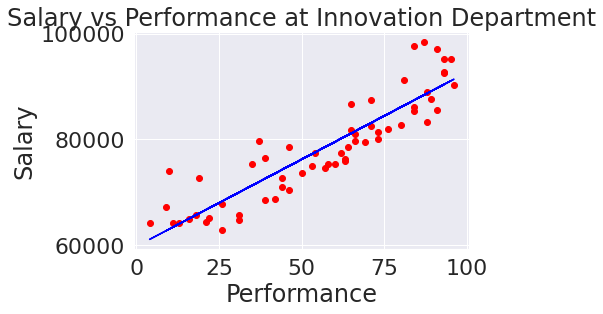

In [ ]:
plt.scatter(X_train_innovation,y_train_innovation, color='red',)
plt.plot(X_train_innovation,regressor_innovation.predict(X_train_innovation), color='blue')
plt.title('Salary vs Performance at Innovation Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_innovation_test = df_test[df_test['Department']=='innovation']
X_test_innovation = df_innovation_test['Performance'].tolist()
X_test_innovation = np.array(X_test_innovation).reshape((len(X_test_innovation),1))

total_innovation_pred = regressor_innovation.predict(X_test_innovation)

df_innovation_test['Salary offer'] = total_innovation_pred *0.95
df_innovation_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
19,6254597NNK,Jack,Huggins,male,60,1961-04-28,14,4,innovation,Slovakia,68,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,78054.197472
21,6197046XXA,Pamela,Maertz,female,49,1972-04-22,6,4,innovation,Republic of Congo,71,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,78992.347257
24,5688785JVL,Nancy,Lewis,female,22,1999-10-12,0,7,innovation,Denmark,19,0,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,62731.084311
25,6807647XOE,Virginia,Hicks,female,37,1984-11-21,11,6,innovation,Slovakia,81,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,82119.513208
36,8290291PZI,Farah,King,female,49,1972-03-03,23,7,innovation,Luxembourg,37,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,68359.983023


###4.6 Purchasing department

In [ ]:
df_purchasing = df[df['Department']=='purchasing']
X_train_purchasing = df_purchasing['Performance'].tolist()
y_train_purchasing = df_purchasing['Total'].tolist() 

X_train_purchasing = np.array(X_train_purchasing).reshape((len(X_train_purchasing),1))
y_train_purchasing = np.array(y_train_purchasing).reshape((len(y_train_purchasing),1))

regressor_purchasing = LinearRegression()
regressor_purchasing.fit(X_train_purchasing, y_train_purchasing)

LinearRegression()

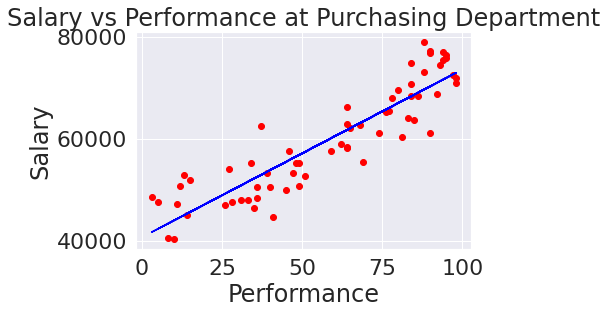

In [ ]:
plt.scatter(X_train_purchasing,y_train_purchasing, color='red',)
plt.plot(X_train_purchasing,regressor_purchasing.predict(X_train_purchasing), color='blue')
plt.title('Salary vs Performance at Purchasing Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_purchasing_test = df_test[df_test['Department']=='purchasing']
X_test_purchasing = df_purchasing_test['Performance'].tolist()
X_test_purchasing = np.array(X_test_purchasing).reshape((len(X_test_purchasing),1))

total_purchasing_pred = regressor_purchasing.predict(X_test_purchasing)

df_purchasing_test['Salary offer'] = total_purchasing_pred *0.95
df_purchasing_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
17,3384053JMC,Paul,Roberts,male,50,1971-03-25,3,7,purchasing,Estonia,83,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,64576.219676
30,0957116QTK,Caridad,Summers,female,61,1960-05-12,24,5,purchasing,China,19,1,0,1,1,0,0,1,1,1,0,1,0,1,1,0,1,44612.560435
33,7148027EPO,James,Marino,male,61,1960-08-25,3,5,purchasing,Belgium,26,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,46796.085664
44,4985189XSE,Kurt,Ledbetter,male,34,1987-03-20,3,4,purchasing,Belgium,43,1,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,52098.932650
51,8104856HLT,Barbara,Roeber,female,47,1974-09-15,21,8,purchasing,France,37,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,1,50227.339596


###4.7 Finance department

In [ ]:
df_finance = df[df['Department']=='finance']
X_train_finance = df_finance['Performance'].tolist()
y_train_finance = df_finance['Total'].tolist() 

X_train_finance = np.array(X_train_finance).reshape((len(X_train_finance),1))
y_train_finance = np.array(y_train_finance).reshape((len(y_train_finance),1))

regressor_finance = LinearRegression()
regressor_finance.fit(X_train_finance, y_train_finance)

LinearRegression()

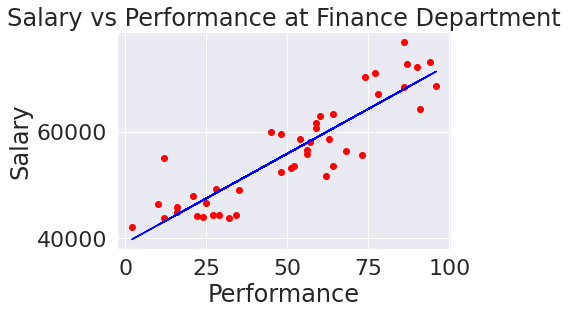

In [ ]:
plt.scatter(X_train_finance,y_train_finance, color='red',)
plt.plot(X_train_finance,regressor_finance.predict(X_train_finance), color='blue')
plt.title('Salary vs Performance at Finance Department')
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.show()

In [ ]:
df_finance_test = df_test[df_test['Department']=='finance']
X_test_finance = df_finance_test['Performance'].tolist()
X_test_finance = np.array(X_test_finance).reshape((len(X_test_finance),1))

total_finance_pred = regressor_finance.predict(X_test_finance)

df_finance_test['Salary offer'] = total_finance_pred *0.95
df_finance_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
1,1026355EJG,Louis,Bennett,male,52,1969-04-25,11,5,finance,Slovenia,60,1,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,56348.825557
15,0306915UTF,Robert,Barreras,male,49,1972-09-20,21,4,finance,Belgium,54,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,54433.218637
39,2090551UMO,Herschel,Iser,male,50,1971-07-28,24,6,finance,Bulgaria,90,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,0,65926.860155
45,4715389OWK,Joan,Martin,female,60,1961-02-04,19,6,finance,Sweden,12,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,41023.970201
52,3830684DXV,Terri,Graham,female,33,1988-04-17,5,5,finance,Croatia,74,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,1,60818.575036


### 4.8 Combining the outcomes


After the application of the regression to generate a salary offer below expected level, specifically 95%, the data will be put together in a dataframe through the append tool. Lastly, the data will be sorted based on the index number. This will give the original format of the dataset 'A4_2.csv', with the column 'Salary offer'.

In [ ]:
# append new df from individual departments 
df_test_salary_offer = df_design_test.append(df_finance_test)
df_test_salary_offer1 = df_test_salary_offer.append(df_innovation_test)
df_test_salary_offer2 = df_test_salary_offer1.append(df_sales_test)
df_test_salary_offer3 = df_test_salary_offer2.append(df_operations_test)
df_test_salary_offer4 = df_test_salary_offer3.append(df_marketing_test)
df_test_salary_offer_total = df_test_salary_offer4.append(df_purchasing_test)

# resort according to index
df_test_salary_offer_total = df_test_salary_offer_total.sort_index()
df_test_salary_offer_total

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Salary offer
0,7161223DRO,Marie,Wofford,female,47,1974-08-23,0,8,marketing,Spain,66,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,84015.749825
1,1026355EJG,Louis,Bennett,male,52,1969-04-25,11,5,finance,Slovenia,60,1,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,56348.825557
2,7771383CNN,Larry,Faz,male,36,1985-08-24,10,7,marketing,Sweden,25,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,73651.408491
3,4185856VIM,Brittany,Newman,female,25,1996-08-15,0,5,operations,Bulgaria,17,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,50682.482401
4,2978676ENQ,Jason,Corvino,male,60,1961-05-15,22,8,design,China,32,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,59262.649831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0144998MUS,Orlando,Hilker,male,45,1976-05-23,16,6,innovation,Poland,87,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,83995.812779
96,5710192MMZ,Elizabeth,Jennings,female,25,1996-08-26,0,4,marketing,Belgium,44,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,1,78454.395938
97,0303493QZI,James,Wheat,male,41,1980-10-14,6,5,innovation,United Kingdom,84,0,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,83057.662994
98,5573981DNP,Gloria,Shannon,female,61,1960-07-29,31,5,design,Portugal,33,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,59522.794937


In [ ]:
# save new file salaries
df_test_salary_offer_total.to_csv('/content/drive/Shareddrives/SIO - Group 2.1 (S1b)/A4 (14.01.2022)/A4_2 Salary offer - team 2.1 - Assignment 4.csv', sep=',')